<a href="https://colab.research.google.com/github/Tdas-christ/Reinforcement_Learning/blob/main/2348569_RL_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learned State-Value Function after 2000 episodes:
-----------------------------------------
|  -9.27 |  -9.02 |  -8.51 |  -8.17 |
-----------------------------------------
|  -9.20 |  -8.98 |  -7.77 |  -7.54 |
-----------------------------------------
|  -8.99 |  -8.13 |  -6.00 |  -5.45 |
-----------------------------------------
|  -8.64 |  -7.37 |  -4.89 |  T |
-----------------------------------------


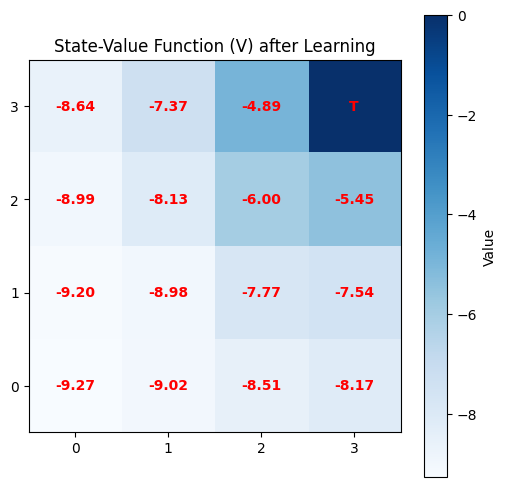

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class GridWorld:
    def __init__(self, rows=4, cols=4, start=(0,0), terminal_states=[(3,3)]):
        self.rows = rows
        self.cols = cols
        self.start = start
        self.terminal_states = terminal_states

        # Define rewards
        self.rewards = np.full((rows, cols), -1.0)
        for t in terminal_states:
            self.rewards[t] = 0.0

        self.state = self.start

    def is_terminal(self, state):
        return state in self.terminal_states

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        """
        Action: 0=up, 1=right, 2=down, 3=left
        """
        r, c = self.state
        if self.is_terminal(self.state):
            return self.state, 0, True

        if action == 0 and r > 0:
            r -= 1
        elif action == 1 and c < self.cols-1:
            c += 1
        elif action == 2 and r < self.rows-1:
            r += 1
        elif action == 3 and c > 0:
            c -= 1

        self.state = (r,c)
        reward = self.rewards[self.state]
        done = self.is_terminal(self.state)
        return self.state, reward, done

    def get_actions(self, state):
        # Four possible moves
        return [0,1,2,3]


def print_values(V, env):
    for r in range(env.rows):
        print("-----------------------------------------")
        for c in range(env.cols):
            v = V[(r,c)]
            if (r,c) in env.terminal_states:
                print("|  T ", end="")
            else:
                print("| %6.2f " % v, end="")
        print("|")
    print("-----------------------------------------")


def simple_policy(env, state):
    # A simple random policy
    actions = env.get_actions(state)
    return np.random.choice(actions)


if __name__ == "__main__":
    # Create the environment
    env = GridWorld(rows=4, cols=4, start=(0,0), terminal_states=[(3,3)])

    # Initialize value function
    V = {}
    for r in range(env.rows):
        for c in range(env.cols):
            V[(r,c)] = 0.0  # initial values

    gamma = 0.9  # discount factor
    alpha = 0.1  # learning rate
    episodes = 2000

    # Run multiple episodes of interaction
    for ep in range(episodes):
        s = env.reset()
        done = False
        while not done:
            a = simple_policy(env, s)
            s_next, reward, done = env.step(a)

            # TD(0) update
            if done:
                V[s] = V[s] + alpha * (reward - V[s])
            else:
                V[s] = V[s] + alpha * (reward + gamma * V[s_next] - V[s])

            s = s_next

    print("Learned State-Value Function after {} episodes:".format(episodes))
    print_values(V, env)

    # Prepare data for visualization
    value_grid = np.zeros((env.rows, env.cols))
    for r in range(env.rows):
        for c in range(env.cols):
            value_grid[r, c] = V[(r, c)]

    # Plot the value function as a heatmap
    plt.figure(figsize=(6,6))
    plt.imshow(value_grid, cmap='Blues', origin='upper')
    for r in range(env.rows):
        for c in range(env.cols):
            # Annotate each cell with its value
            val_str = "T" if (r,c) in env.terminal_states else f"{V[(r,c)]:.2f}"
            plt.text(c, r, val_str, ha='center', va='center', color='red', fontweight='bold')

    plt.colorbar(label='Value')
    plt.title('State-Value Function (V) after Learning')
    plt.xticks(np.arange(env.cols))
    plt.yticks(np.arange(env.rows))
    plt.gca().invert_yaxis()  # so (0,0) is top-left visually
    plt.show()
